# Lineare Regression für Umsatzvorhersage

Dieses Notebook implementiert ein lineares Regressionsmodell zur Vorhersage von Umsätzen basierend auf verschiedenen Features wie Datum und Warengruppe.

## Übersicht
1. Daten laden und vorbereiten
2. Feature Engineering
3. Modell Training
4. Modell Evaluation
5. Visualisierungen

## 1. Bibliotheken importieren und Setup

In [1]:
# Benötigte Bibliotheken importieren
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Stil für die Plots setzen
sns.set_theme(style="whitegrid")

## 2. Daten laden und vorbereiten

In [2]:
# Daten einlesen
print("Lese Daten ein...")
df = pd.read_csv('umsatzdaten_gekuerzt.csv')
print(f"Datensatz geladen: {len(df)} Zeilen")

# Datum in datetime umwandeln
print("\nKonvertiere Datum...")
df['Datum'] = pd.to_datetime(df['Datum'])

# Erste Zeilen des Datensatzes anzeigen
df.head()

Lese Daten ein...
Datensatz geladen: 9334 Zeilen

Konvertiere Datum...


,Datum,Warengruppe,Umsatz
0,2013-07-01,1,148.828353
1,2013-07-02,1,159.793757
2,2013-07-03,1,111.885594
3,2013-07-04,1,168.864941
4,2013-07-05,1,171.280754


## 3. Feature Engineering

In [3]:
# Feature Engineering
print("Erstelle Features...")
df['Jahr'] = df['Datum'].dt.year
df['Monat'] = df['Datum'].dt.month
df['Wochentag'] = df['Datum'].dt.dayofweek  # 0 = Montag, 6 = Sonntag

# One-hot encoding für Warengruppe
print("Erstelle One-hot encoding für Warengruppen...")
warengruppen_dummies = pd.get_dummies(df['Warengruppe'], prefix='Warengruppe')
df = pd.concat([df, warengruppen_dummies], axis=1)

# Features für das Modell auswählen
feature_columns = ['Jahr', 'Monat', 'Wochentag'] + list(warengruppen_dummies.columns)
X = df[feature_columns]
y = df['Umsatz']

# Features anzeigen
print("\nVerwendete Features:")
print(feature_columns)

Erstelle Features...
Erstelle One-hot encoding für Warengruppen...

Verwendete Features:
['Jahr', 'Monat', 'Wochentag', 'Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6']


## 4. Modell Training

In [4]:
print("Teile Daten in Training und Test...")
# Daten in Trainings- und Testset aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTrainiere Modell...")
# Lineares Regressionsmodell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

print("\nMache Vorhersagen...")
# Vorhersagen machen
y_pred = model.predict(X_test)

Teile Daten in Training und Test...

Trainiere Modell...

Mache Vorhersagen...


## 5. Modell Evaluation

In [5]:
# Modellperformance evaluieren
print('Modell Performance:')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R² Score: %.2f' % r2_score(y_test, y_pred))

# Koeffizienten des Modells anzeigen
print('\nModell Koeffizienten:')
coef_df = pd.DataFrame({'Feature': feature_columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values('Coefficient', ascending=False)
coef_df

Modell Performance:
Mean squared error: 5259.71
R² Score: 0.70

Modell Koeffizienten:


,Feature,Coefficient
4,Warengruppe_2,220.484741
7,Warengruppe_5,92.646748
2,Wochentag,10.380562
1,Monat,1.366367
0,Jahr,-8.190896
5,Warengruppe_3,-22.018402
3,Warengruppe_1,-63.516043
6,Warengruppe_4,-96.431245
8,Warengruppe_6,-131.165798


## 6. Visualisierungen

### 6.1 Tatsächliche vs. Vorhergesagte Umsätze

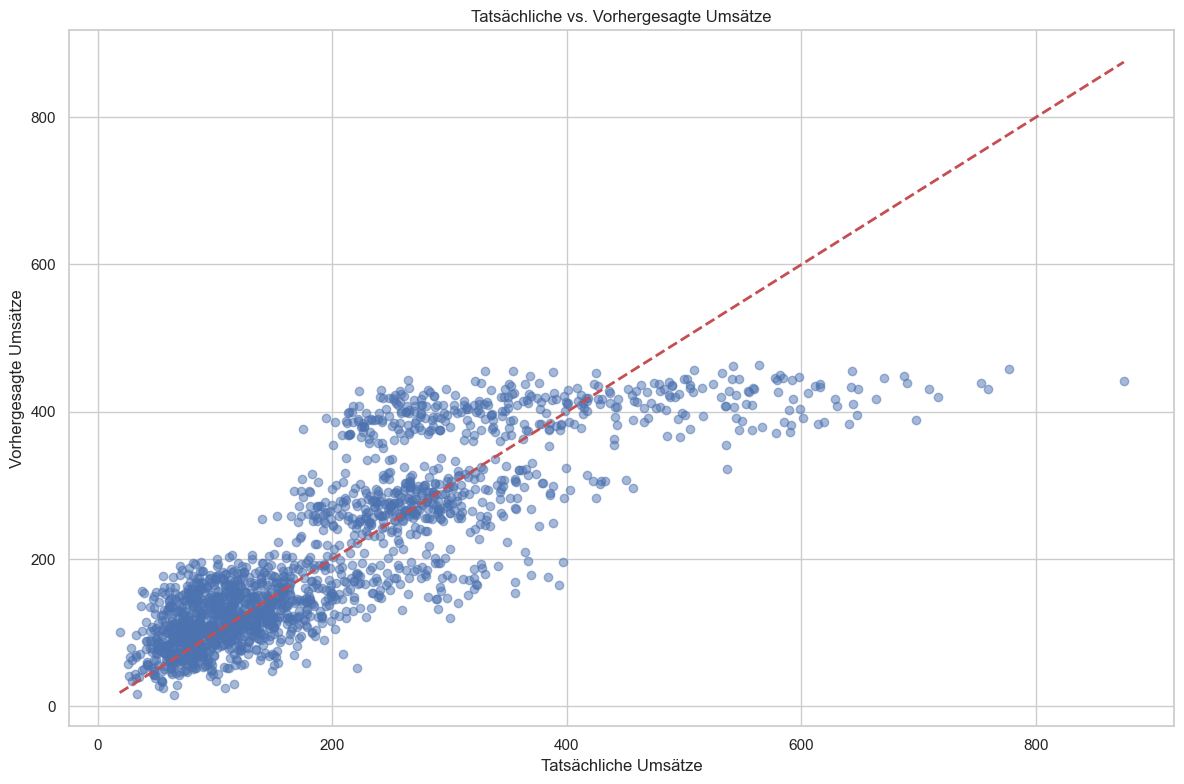

In [6]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Tatsächliche Umsätze')
plt.ylabel('Vorhergesagte Umsätze')
plt.title('Tatsächliche vs. Vorhergesagte Umsätze')
plt.tight_layout()
plt.show()

### 6.2 Durchschnittlicher Umsatz nach Wochentag

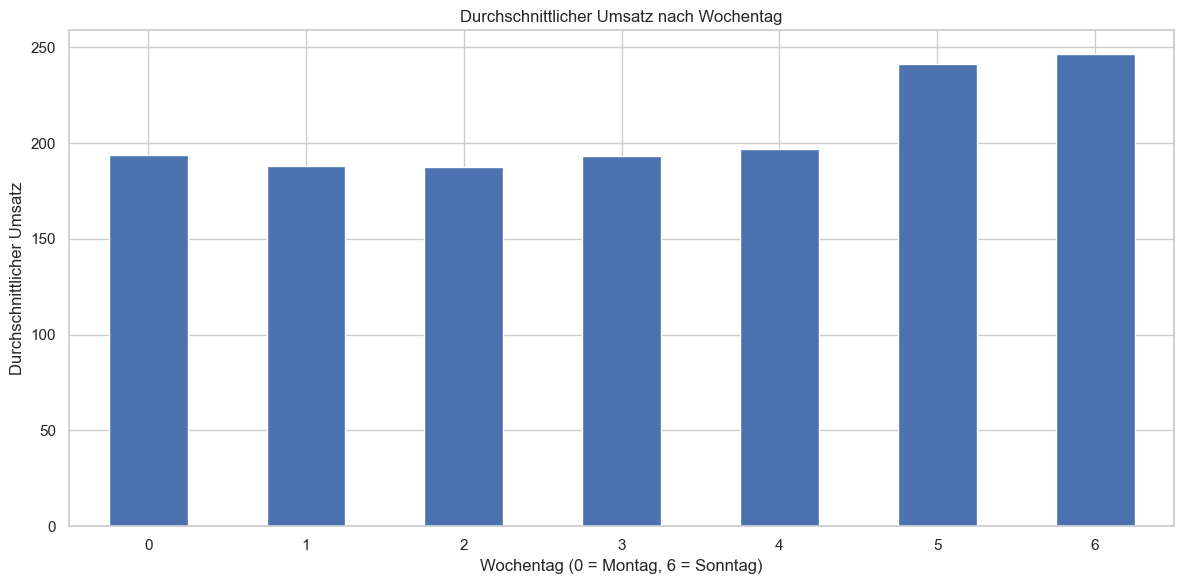

In [7]:
plt.figure(figsize=(12, 6))
avg_by_day = df.groupby('Wochentag')['Umsatz'].mean()
avg_by_day.plot(kind='bar')
plt.title('Durchschnittlicher Umsatz nach Wochentag')
plt.xlabel('Wochentag (0 = Montag, 6 = Sonntag)')
plt.ylabel('Durchschnittlicher Umsatz')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 6.3 Durchschnittlicher Umsatz nach Warengruppe

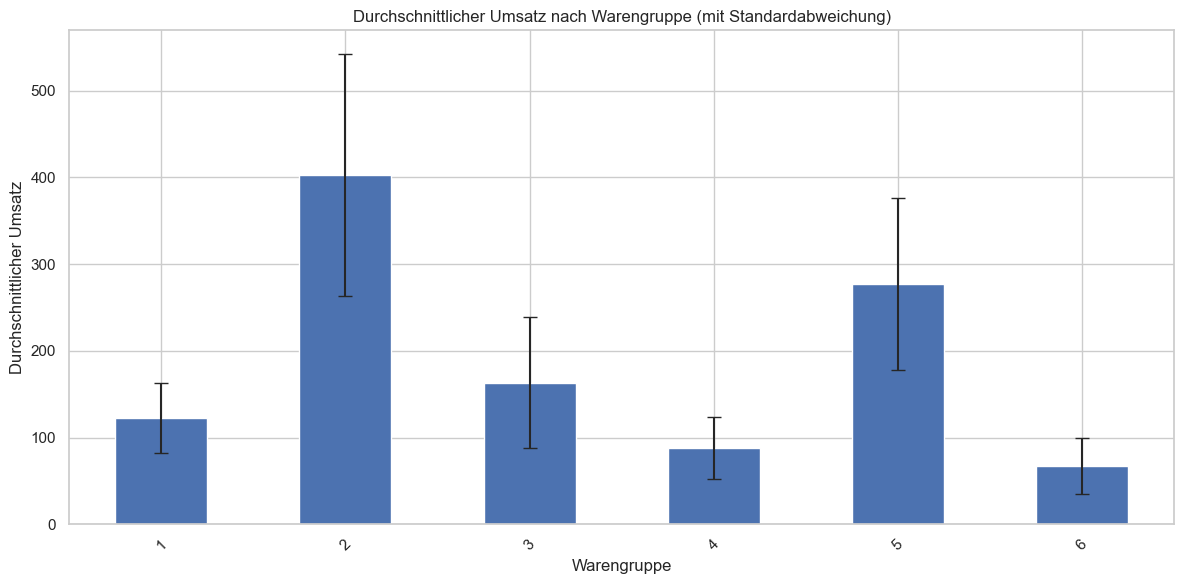

In [8]:
plt.figure(figsize=(12, 6))
avg_by_group = df.groupby('Warengruppe')['Umsatz'].agg(['mean', 'std']).round(2)
avg_by_group['mean'].plot(kind='bar', yerr=avg_by_group['std'], capsize=5)
plt.title('Durchschnittlicher Umsatz nach Warengruppe (mit Standardabweichung)')
plt.xlabel('Warengruppe')
plt.ylabel('Durchschnittlicher Umsatz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.4 Umsatztrend über die Zeit

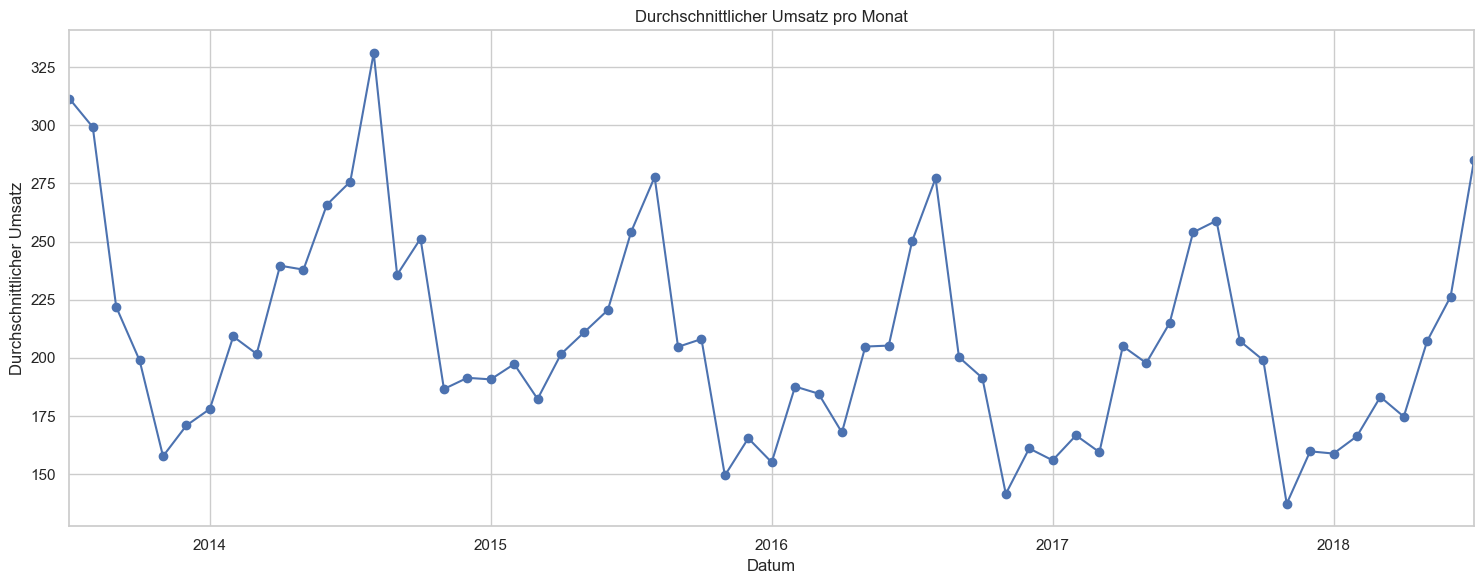

In [9]:
plt.figure(figsize=(15, 6))
monthly_sales = df.groupby([df['Datum'].dt.to_period('M')])['Umsatz'].mean()
monthly_sales.plot(kind='line', marker='o')
plt.title('Durchschnittlicher Umsatz pro Monat')
plt.xlabel('Datum')
plt.ylabel('Durchschnittlicher Umsatz')
plt.grid(True)
plt.tight_layout()
plt.show()

### 6.5 Einfluss der Features

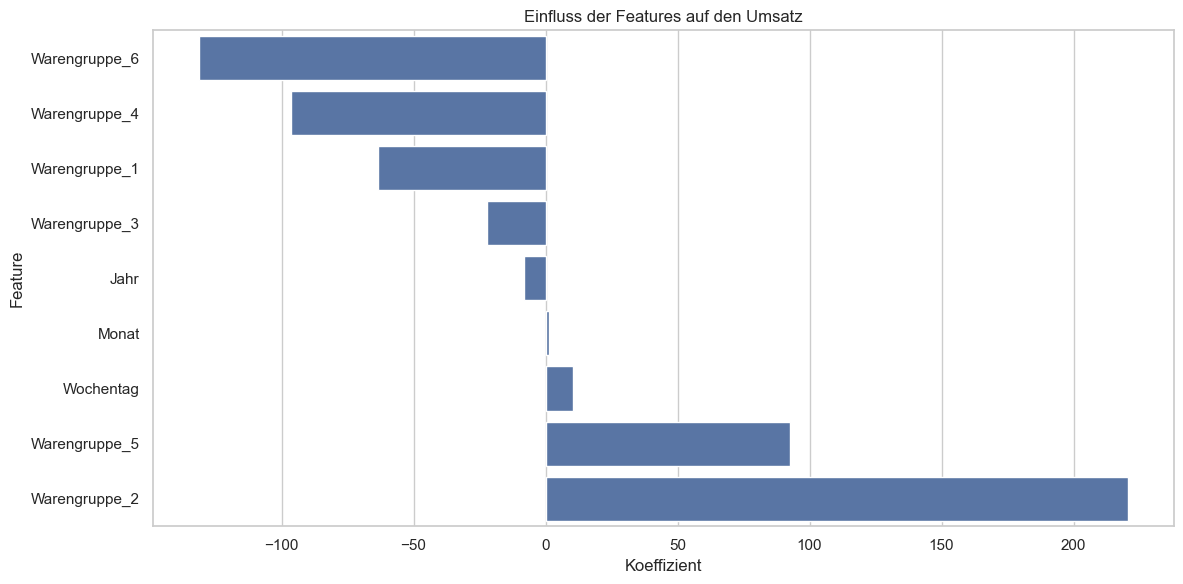

In [10]:
plt.figure(figsize=(12, 6))
coef_df = pd.DataFrame({'Feature': feature_columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values('Coefficient', ascending=True)
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Einfluss der Features auf den Umsatz')
plt.xlabel('Koeffizient')
plt.tight_layout()
plt.show()

## 7. Statistische Zusammenfassung

In [11]:
print("Statistische Zusammenfassung nach Warengruppe:")
df.groupby('Warengruppe')['Umsatz'].describe().round(2)

Statistische Zusammenfassung nach Warengruppe:


,count,mean,std,min,25%,50%,75%,max
Warengruppe,,,,,,,,
1,1819.0,122.14,40.30,23.11,96.44,120.05,144.26,416.79
2,1819.0,402.50,139.66,175.00,289.05,370.83,492.84,1203.43
3,1819.0,163.34,75.58,37.74,105.59,142.81,201.95,565.94
4,1766.0,87.95,35.32,27.43,66.02,79.99,98.35,430.50
5,1819.0,276.80,99.47,121.49,228.97,265.96,307.62,1879.46
6,292.0,66.92,32.37,7.05,41.56,62.91,86.24,172.87
